# Social Data Analysis: Generalities, Complex Networks and Node-Centric Metrics

In this practical work, we will first check if a network satisfies the 3 constraints to be considered as a complex network and then, we will determine how important nodes are within this network.

The library we will use for handling networks is networkx

## First, let's install the potentially missing libraries
(not necessary if you are certain these libs are installed on your system)

In [ ]:
! pip install pandas
! pip install networkx
! pip install seaborn

## Second, let's import the useful packages
You can avoid the first line if you are not using a Jupyter notebook. This line enables the visualization to be displayed in the notebook.

In [ ]:
%matplotlib inline

import networkx as nx
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Good, if you have not encounter any problems, we can start working now!

### First download the dataset (on Moodle)

In [ ]:
# Obviously, you must replace the path below by the appropriate path
pathData = "/content/airports.net"

### Then, navigate through the documentation of the networkx package and find how to load networks in the pajek format

Note that the graph should be __directed__.

TIP: to create a directed simple graph after loading the pajek network, you must use the follwing instruction `g = nx.DiGraph(g)` where `g` is the loaded pajek network.

In [ ]:
g = nx.read_pajek(pathData)
g=nx.DiGraph(g)
print(list(g.nodes())[:10])
print(list(g.edges())[:10])

['Wiley Post-Will Rogers Mem', 'Deadhorse', 'Ralph Wien Memorial', 'Fairbanks Intl', 'Nome', "St Mary's", 'Aniak', 'Anchorage Intl', 'Tuluksak', 'Akiachak']
[('Wiley Post-Will Rogers Mem', 'Fairbanks Intl'), ('Wiley Post-Will Rogers Mem', 'Anchorage Intl'), ('Wiley Post-Will Rogers Mem', 'Deadhorse'), ('Deadhorse', 'Anchorage Intl'), ('Deadhorse', 'Fairbanks Intl'), ('Ralph Wien Memorial', 'Anchorage Intl'), ('Ralph Wien Memorial', 'Nome'), ('Fairbanks Intl', 'Anchorage Intl'), ('Fairbanks Intl', 'Seattle-Tacoma Intl'), ('Fairbanks Intl', 'Juneau Intl')]


# Check the complex network properties
## Long-tail distribution

In [ ]:
!pip install matplotlib powerlaw


Number of edges: 2126
Average degree: 12.81


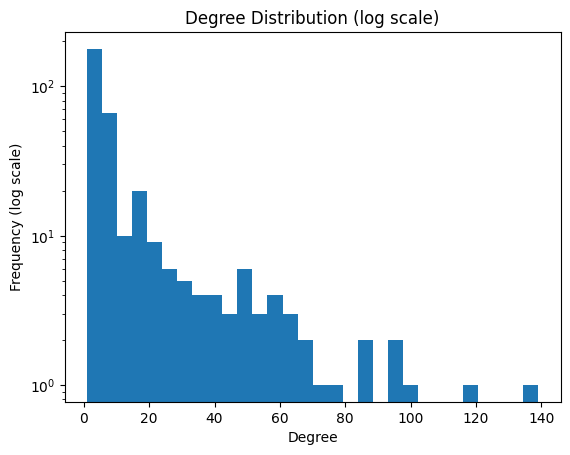

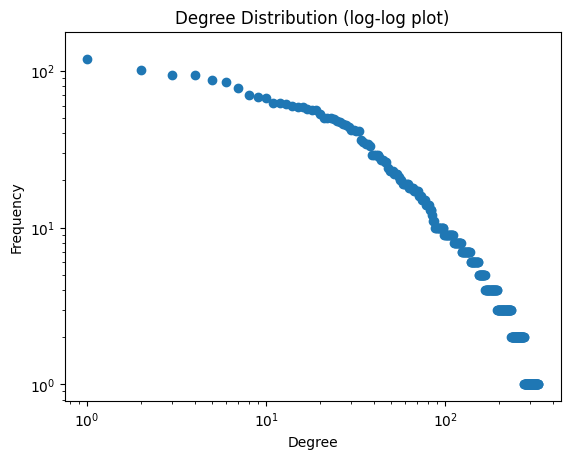

Calculating best minimal value for power law fit
Power-law alpha: 1.8955137087642904
Power-law xmin: 5.0


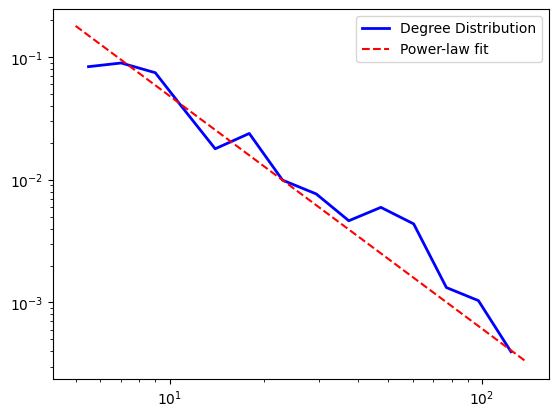

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw

# Load the graph from a Pajek file

# 1. Basic Properties

print(f"Number of edges: {g.number_of_edges()}")
print(f"Average degree: {sum(dict(g.degree()).values())/g.number_of_nodes():.2f}")

# 2. Degree Distribution (to check for long-tail behavior)
degrees = [g.degree(n) for n in g.nodes()]

# Plot degree distribution
plt.hist(degrees, bins=30, log=True)
plt.title("Degree Distribution (log scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.show()

# 3. Log-log plot for the degree distribution
plt.loglog(sorted(degrees, reverse=True), marker='o', linestyle='None')
plt.title("Degree Distribution (log-log plot)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# 4. Fit a power-law to the degree distribution
fit = powerlaw.Fit(degrees)
print(f"Power-law alpha: {fit.alpha}")
print(f"Power-law xmin: {fit.xmin}")

# Plot the fitted power-law alongside the degree distribution
fig = fit.plot_pdf(color='b', linewidth=2, label='Degree Distribution')
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig, label='Power-law fit')
plt.legend()
plt.show()


### Plot the degree distribution of the graph
  1. Calculate and store the degree of each node
  2. Convert the result (a dict) into a Pandas object, a Series
  3. Use the seaborn `distplot` function to plot the degree distribution. Check the documenetation to set the parameters as follows: 20 bins and no gaussian kernel density estimate. Note that you must use the `plt.show()` instruction afterward to visualize the result.


<ipython-input-7-b894ff632cf3>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(degrees_series, bins=20, kde=False)  # kde=False disables the Gaussian kernel density estimate


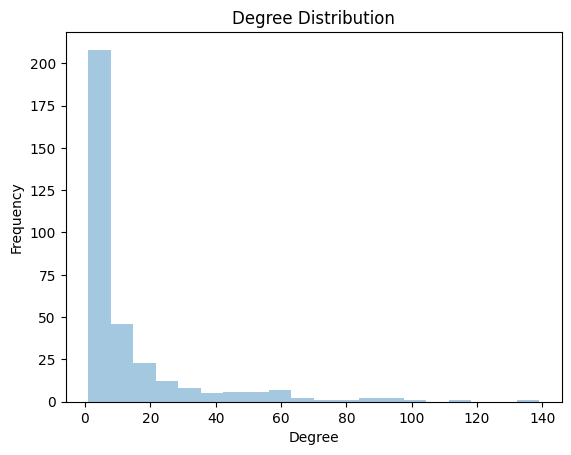

In [ ]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Calculate the degree of each node and store it in a Pandas Series
degrees_dict = dict(g.degree())  # Get the degree of each node as a dictionary
degrees_series = pd.Series(degrees_dict.values())  # Convert dictionary values to Pandas Series

# 3. Plot the degree distribution using Seaborn's distplot
sns.distplot(degrees_series, bins=20, kde=False)  # kde=False disables the Gaussian kernel density estimate
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# 4. Show the plot
plt.show()


### Check if the graph satisfies the power-law degree property
Modify the call to the `distplot` function to graphically check if the degree distibution fits a power-law distribution. To do so, you should set the `fit` parameter to `stats.powerlaw`. Conclude.

Calculating best minimal value for power law fit


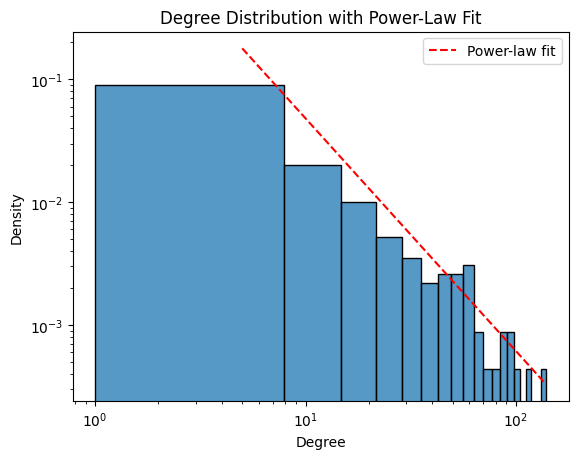

Power-law exponent (alpha): 1.8955137087642904
Power-law xmin: 5.0


In [ ]:



# 3. Fit the degree distribution to a power-law model using the powerlaw package
fit = powerlaw.Fit(degrees_series)

# 4. Plot the histogram of degree distribution using seaborn
sns.histplot(degrees_series, bins=20, kde=False, stat='density')
plt.title("Degree Distribution with Power-Law Fit")
plt.xlabel("Degree")
plt.ylabel("Density")

# 5. Plot the fitted power-law distribution
fit.power_law.plot_pdf(color='r', linestyle='--', label='Power-law fit')
plt.legend()

# 6. Show the plot
plt.show()

# 7. Print out the power-law fit parameters (exponent and xmin)
print(f"Power-law exponent (alpha): {fit.alpha}")
print(f"Power-law xmin: {fit.xmin}")


## Small-world hypothesis
We now want to check if this network satisfies the small-world hypothesis. Calculate the average shortest path length and conclude if this network satisfies the small world hypothesis.
  

### Check the strong community structure
To check how string is the community structure in this network, we will apply the following methodology:
  1. Use the `gnm_random_graph` function to generate a random graph having the same number of vertices and edges than the studied network
  2. Calculate the average clustering on both networks
  3. Conclude

In [ ]:
G= nx.read_pajek(pathData)
G =nx.DiGraph(G)

In [ ]:
import networkx as nx
import numpy as np

# If the graph is directed, convert it to undirected for shortest path calculation
if G.is_directed():
    print("Graph is directed. Converting to undirected for shortest path calculations.")
    G = G.to_undirected()

# Check if the graph is connected (works only for undirected graphs)
if nx.is_connected(G):
    # Calculate the average shortest path length
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"Average shortest path length of the undirected network: {avg_shortest_path_length:.4f}")
else:
    print("Graph is not connected. Calculating for the largest connected component.")
    largest_component = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_component)
    avg_shortest_path_length = nx.average_shortest_path_length(G_sub)
    print(f"Average shortest path length of the largest connected component: {avg_shortest_path_length:.4f}")

# Generate a random graph with the same number of nodes and edges
n = G.number_of_nodes()
m = G.number_of_edges()
random_graph = nx.gnm_random_graph(n, m)

# Check connectivity of the random graph and calculate its average shortest path length
if nx.is_connected(random_graph):
    avg_shortest_path_random = nx.average_shortest_path_length(random_graph)
else:
    largest_component_random = max(nx.connected_components(random_graph), key=len)
    random_graph_sub = random_graph.subgraph(largest_component_random)
    avg_shortest_path_random = nx.average_shortest_path_length(random_graph_sub)

print(f"Average shortest path length of the random graph: {avg_shortest_path_random:.4f}")

# Calculate the average clustering coefficient for both networks
clustering_network = nx.average_clustering(G)
clustering_random = nx.average_clustering(random_graph)

print(f"Average clustering coefficient of the network: {clustering_network:.4f}")
print(f"Average clustering coefficient of the random graph: {clustering_random:.4f}")

# Conclusion on small-world hypothesis
if clustering_network > clustering_random and avg_shortest_path_length < avg_shortest_path_random:
    print("The network satisfies the small-world hypothesis.")
else:
    print("The network does not satisfy the small-world hypothesis.")

# Conclusion on community structure
if clustering_network > clustering_random:
    print("The network has a strong community structure.")
else:
    print("The network does not have a strong community structure.")


Graph is directed. Converting to undirected for shortest path calculations.
Average shortest path length of the undirected network: 2.7381
Average shortest path length of the random graph: 2.5553
Average clustering coefficient of the network: 0.6252
Average clustering coefficient of the random graph: 0.0396
The network does not satisfy the small-world hypothesis.
The network has a strong community structure.


# Node-Centric Metrics
We will now focus on the relative importance of vertices within the network. Luckily, many centrality metrics are implemented in networkx.

## Centrality Metrics
Have a look to the package documentation and calculate the following centralities:
  1. degree
  2. closeness
  3. eigenvector
  4. Katz
  5. betweenness

In [ ]:
import networkx as nx
from IPython.display import display, HTML

# Assuming G is your graph object (either directed or undirected)

# Helper function to format output with HTML
def format_output(title, centrality_dict, color):
    html_content = f"<h2 style='color:{color}; font-size:24px;'>{title}</h2>"
    for node, centrality in centrality_dict.items():
        html_content += f"<p style='font-size:18px;'>Node {node}: {centrality:.4f}</p>"
    display(HTML(html_content))

# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)
format_output("Degree Centrality", degree_centrality, "blue")

# 2. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
format_output("Closeness Centrality", closeness_centrality, "green")

# 3. Eigenvector Centrality
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=2000, tol=1.0e-6)
    format_output("Eigenvector Centrality", eigenvector_centrality, "purple")
except nx.PowerIterationFailedConvergence as e:
    display(HTML(f"<h2 style='color:red; font-size:24px;'>Eigenvector Centrality Error: {e}</h2>"))

# 4. Katz Centrality
try:
    katz_centrality = nx.katz_centrality(G, alpha=0.01, beta=1.0)
    format_output("Katz Centrality", katz_centrality, "orange")
except nx.NetworkXError as e:
    display(HTML(f"<h2 style='color:red; font-size:24px;'>Katz Centrality Error: {e}</h2>"))

# 5. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
format_output("Betweenness Centrality", betweenness_centrality, "cyan")


## Page Rank and HITS
Similarly to the previous question, have a look to the package documentation and calculate the following metrics:

  1. Page Rank
  2. Hub and Authorities (HITS)


In [ ]:
import networkx as nx
from IPython.display import display, HTML

# Helper function to format output with HTML
def format_output(title, centrality_dict, color):
    html_content = f"<h2 style='color:{color}; font-size:24px;'>{title}</h2>"
    for node, centrality in centrality_dict.items():
        html_content += f"<p style='font-size:18px;'>Node {node}: {centrality:.4f}</p>"
    display(HTML(html_content))

# Assuming G is your graph object (either directed or undirected)

# 1. PageRank Centrality
try:
    pagerank_centrality = nx.pagerank(G, alpha=0.85)
    format_output("PageRank Centrality", pagerank_centrality, "magenta")
except nx.NetworkXError as e:
    display(HTML(f"<h2 style='color:red; font-size:24px;'>PageRank Centrality Error: {e}</h2>"))

# 2. HITS (Hub and Authority Scores)
try:
    hubs, authorities = nx.hits(G)
    format_output("Hub Centrality", hubs, "red")
    format_output("Authority Centrality", authorities, "blue")
except nx.NetworkXError as e:
    display(HTML(f"<h2 style='color:red; font-size:24px;'>HITS Error: {e}</h2>"))


## On the correlation of node-centric metrics
First, create a dataframe using with the above calculated centralities.

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming G is your graph object (either directed or undirected)

# Calculate centralities
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=2000, tol=1.0e-6)
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = {}
try:
    katz_centrality = nx.katz_centrality(G, alpha=0.01, beta=1.0)
except nx.NetworkXError:
    katz_centrality = {}
betweenness_centrality = nx.betweenness_centrality(G)
try:
    pagerank_centrality = nx.pagerank(G, alpha=0.85)
except nx.NetworkXError:
    pagerank_centrality = {}
try:
    hubs, authorities = nx.hits(G)
except nx.NetworkXError:
    hubs, authorities = {}, {}

# Create a DataFrame
centralities_df = pd.DataFrame({
    'Degree': pd.Series(degree_centrality),
    'Closeness': pd.Series(closeness_centrality),
    'Eigenvector': pd.Series(eigenvector_centrality),
    'Katz': pd.Series(katz_centrality),
    'Betweenness': pd.Series(betweenness_centrality),
    'PageRank': pd.Series(pagerank_centrality),
    'Hub': pd.Series(hubs),
    'Authority': pd.Series(authorities)
})



Then, we will plot the pairwise relationships between centralities to have a first glimpse of the possible correlation between them. For this, use the `pairplot` function of the `seaborn` package.

,Degree,Closeness,Eigenvector,Katz,Betweenness,PageRank,Hub,Authority
Wiley Post-Will Rogers Mem,0.009063,0.313447,0.000796,0.044870,0.00000,0.001506,0.000358,0.000358
Deadhorse,0.009063,0.313447,0.000796,0.044870,0.00000,0.001306,0.000299,0.000299
Ralph Wien Memorial,0.006042,0.313150,0.000708,0.044404,0.00000,0.001020,0.000273,0.000273
Fairbanks Intl,0.015106,0.358613,0.003546,0.046167,0.00076,0.002507,0.001385,0.001385
Nome,0.006042,0.313150,0.000708,0.044404,0.00000,0.001023,0.000275,0.000275


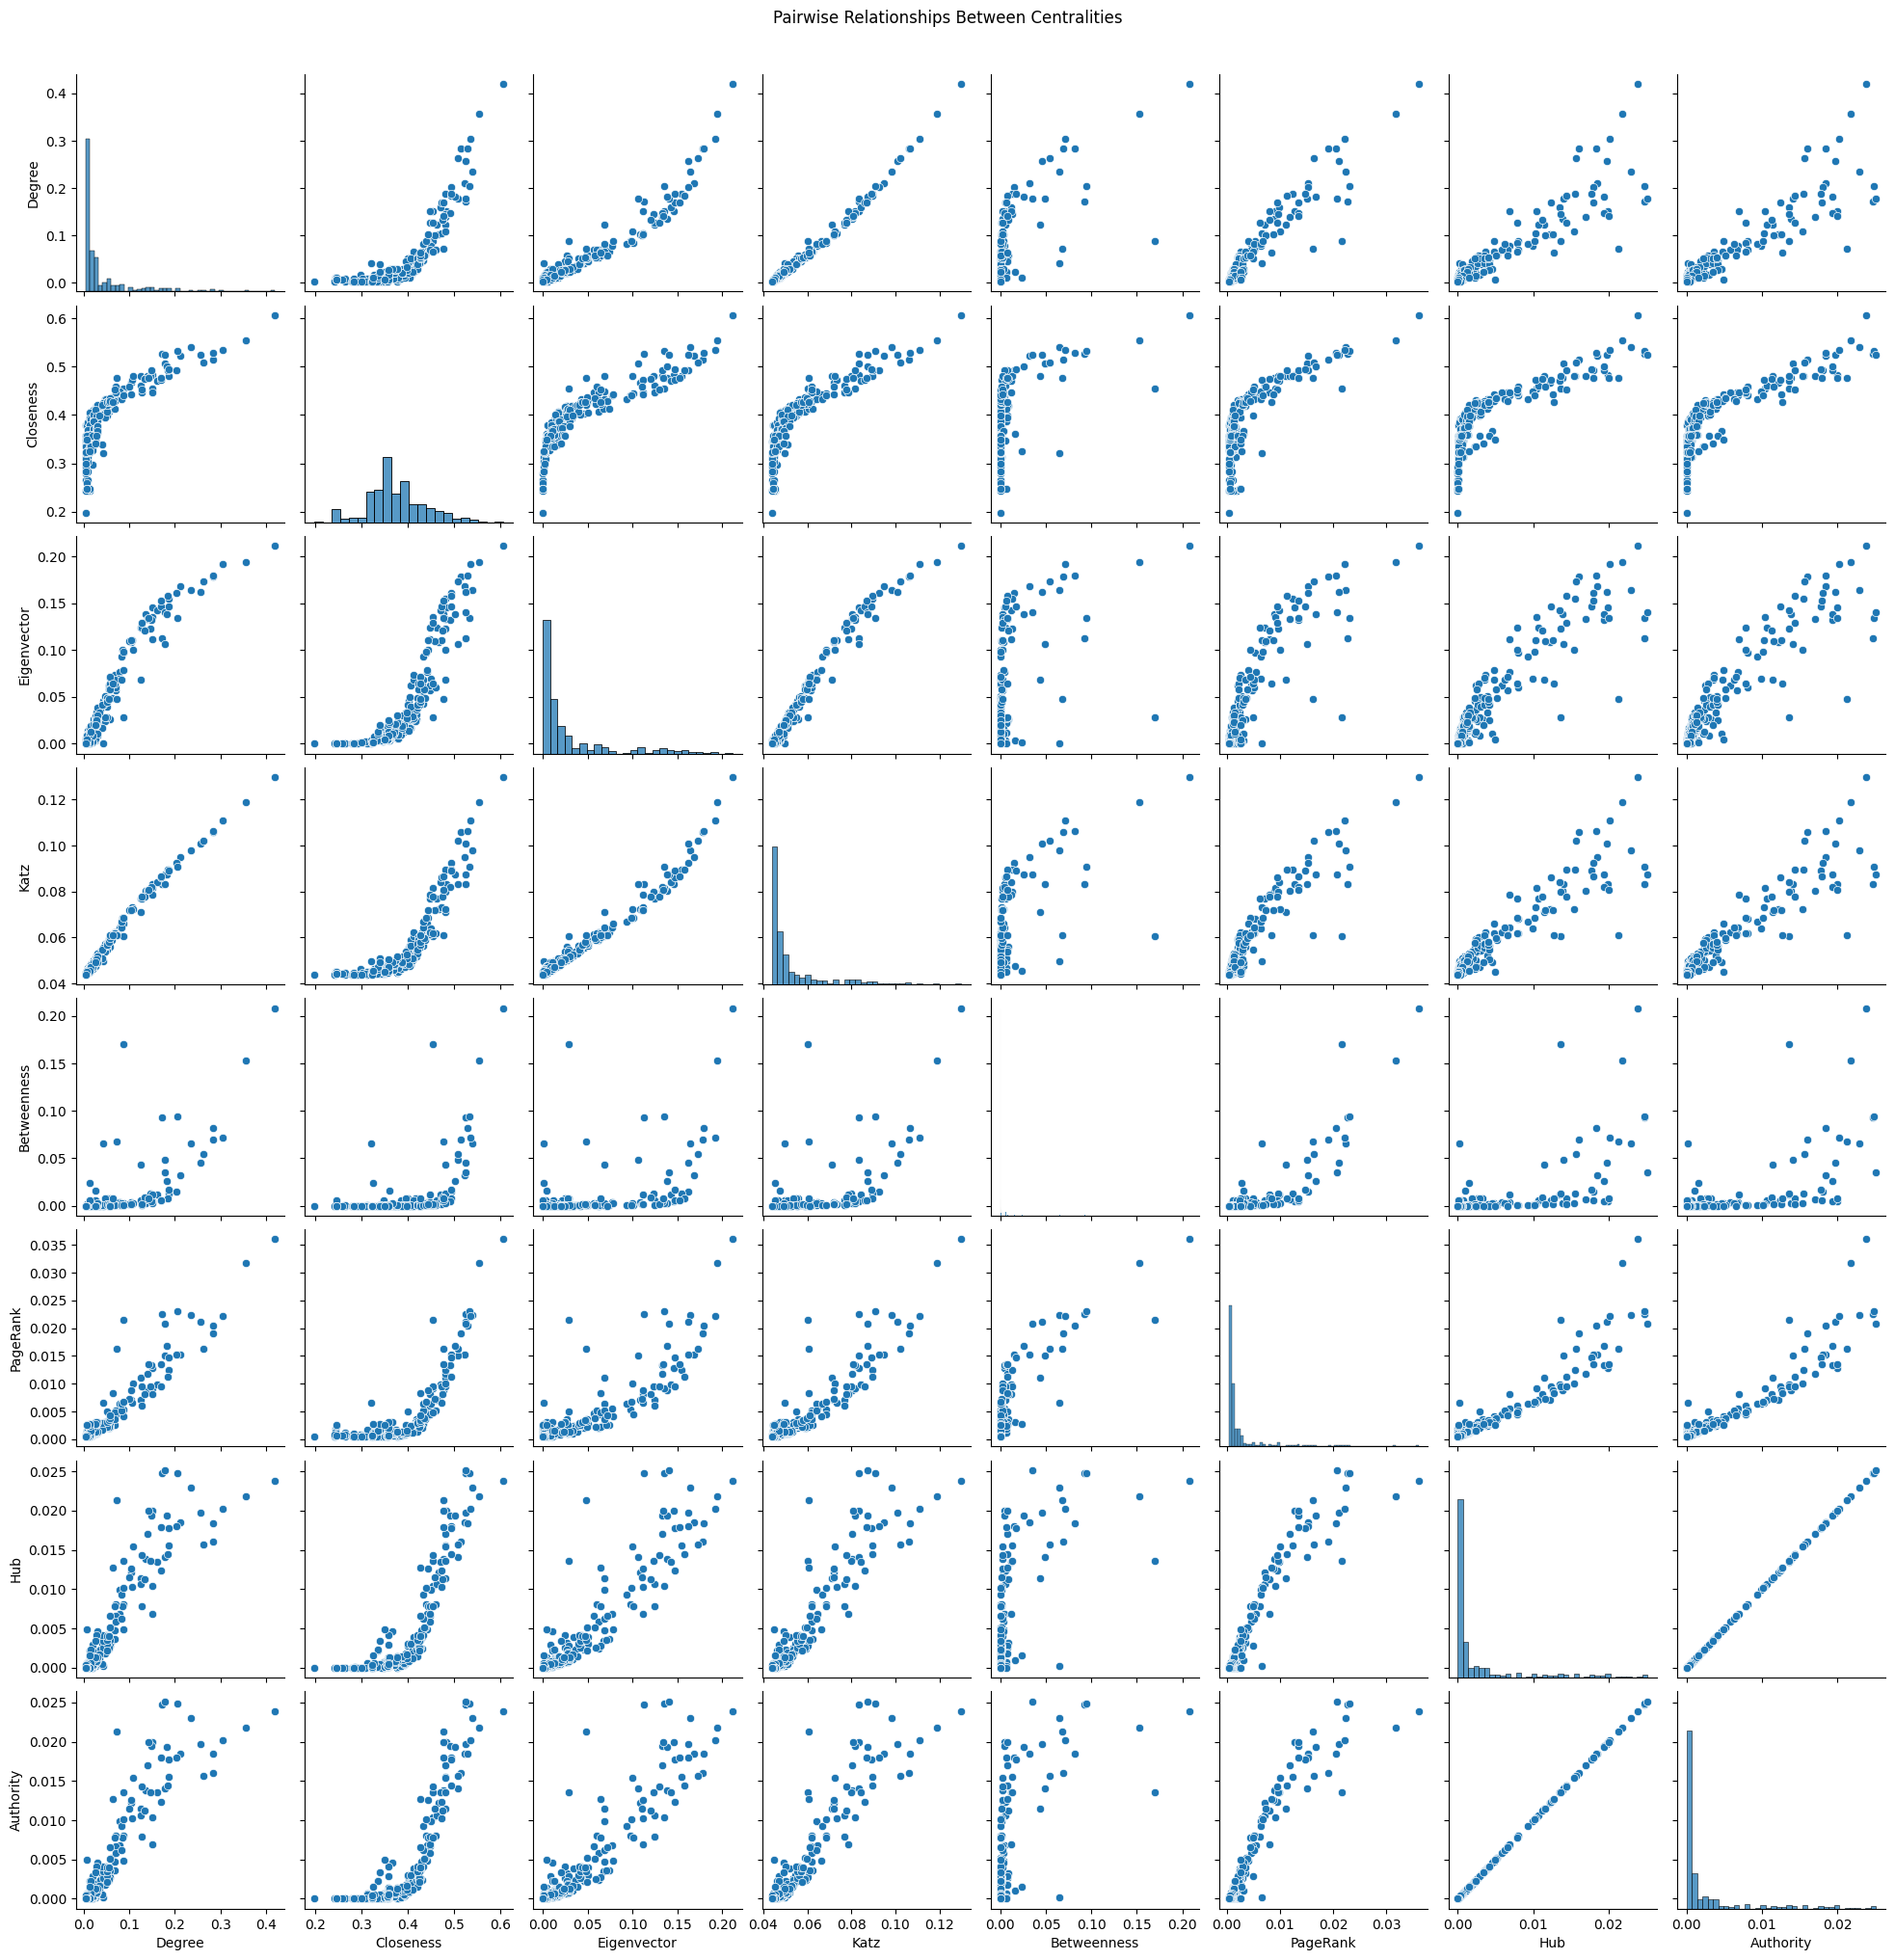

In [ ]:
cleaned_df = centralities_df.dropna()

# Display the DataFrame
display(HTML(cleaned_df.head().to_html()))

# Plot pairwise relationships
sns.pairplot(cleaned_df)
plt.suptitle("Pairwise Relationships Between Centralities", y=1.02)
plt.show()

We will now assess more properly these potential correlations. For this, use the `corr()` on your data frame. Be aware that the default method mignt not be appropriate to your case. Once the pairwise correlations have been calculated, we will plot the related method using the `heatmap()` function of the `seaborn` package. TIP: to change the color scheme, you can use the `cmap` parameter with value `plt.get_cmap(xxx)` where `xxx` is a color scheme (visit [this site](https://matplotlib.org/users/colormaps.html) to get the list of existing cholor schemes).

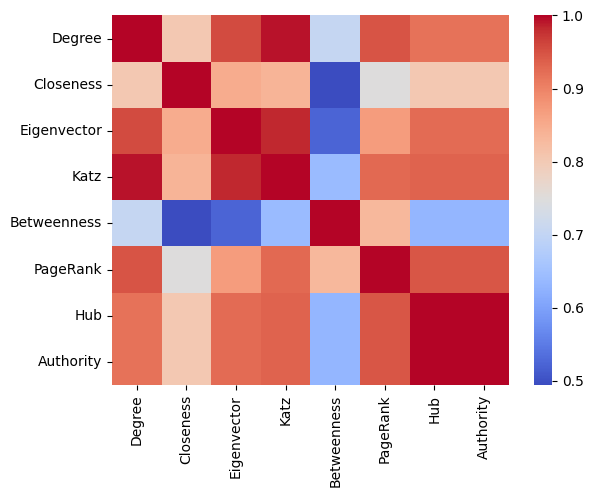

In [ ]:
correlation = cleaned_df.corr()
sns.heatmap(correlation, cmap=plt.get_cmap('coolwarm'))
plt.show()

On the finding of atypical vertices
------------------------------------

As discussed during the lecture ans as you have just seen in the previous question, centrality metrics are often positively correlated. We will now find some key vertices in the network. Typically, these vertices are vertices that somehow "break" the positive pairwise correlations.
You mission is to find at least one of these vertices. To do so, you will apply the following methodology:
  1. Extract the 10 top airports per centrality metric
  2. Comparethe list and conclude


In [ ]:
import pandas as pd

# Assuming cleaned_df is the DataFrame with centrality metrics

# Get the top 10 vertices for each centrality metric
top_10_per_metric = {}
for metric in cleaned_df.columns:
    # Sorting the values and getting the top 10
    top_10 = cleaned_df[metric].nlargest(10).index.tolist()
    top_10_per_metric[metric] = top_10

# Convert to DataFrame for easier comparison
top_10_df = pd.DataFrame(top_10_per_metric)
print("Top 10 Vertices per Centrality Metric:")
display(HTML(top_10_df.to_html()))


Top 10 Vertices per Centrality Metric:


,Degree,Closeness,Eigenvector,Katz,Betweenness,PageRank,Hub,Authority
0,Chicago O'hare Intl,Chicago O'hare Intl,Chicago O'hare Intl,Chicago O'hare Intl,Chicago O'hare Intl,Chicago O'hare Intl,Los Angeles Intl,Los Angeles Intl
1,Dallas/Fort Worth Intl,Dallas/Fort Worth Intl,Dallas/Fort Worth Intl,Dallas/Fort Worth Intl,Anchorage Intl,Dallas/Fort Worth Intl,San Francisco Intl,San Francisco Intl
2,The William B Hartsfield Atlan,Minneapolis-St Paul Intl/Wold-,The William B Hartsfield Atlan,The William B Hartsfield Atlan,Dallas/Fort Worth Intl,San Francisco Intl,Seattle-Tacoma Intl,Seattle-Tacoma Intl
3,Pittsburgh Intll,The William B Hartsfield Atlan,Lambert-St Louis Intl,Lambert-St Louis Intl,San Francisco Intl,Seattle-Tacoma Intl,Chicago O'hare Intl,Chicago O'hare Intl
4,Lambert-St Louis Intl,San Francisco Intl,Pittsburgh Intll,Pittsburgh Intll,Seattle-Tacoma Intl,Minneapolis-St Paul Intl/Wold-,Minneapolis-St Paul Intl/Wold-,Minneapolis-St Paul Intl/Wold-
5,Charlotte/Douglas Intl,Lambert-St Louis Intl,Charlotte/Douglas Intl,Charlotte/Douglas Intl,Lambert-St Louis Intl,The William B Hartsfield Atlan,Dallas/Fort Worth Intl,Dallas/Fort Worth Intl
6,Stapleton Intl,Seattle-Tacoma Intl,Detroit Metropolitan Wayne Cou,Stapleton Intl,The William B Hartsfield Atlan,Anchorage Intl,Honolulu Intl,Honolulu Intl
7,Minneapolis-St Paul Intl/Wold-,Stapleton Intl,Minneapolis-St Paul Intl/Wold-,Minneapolis-St Paul Intl/Wold-,Pittsburgh Intll,Stapleton Intl,The William B Hartsfield Atlan,The William B Hartsfield Atlan
8,Detroit Metropolitan Wayne Cou,Los Angeles Intl,Stapleton Intl,Detroit Metropolitan Wayne Cou,Honolulu Intl,Los Angeles Intl,Miami Intl,Miami Intl
9,San Francisco Intl,Detroit Metropolitan Wayne Cou,Newark Intl,Newark Intl,Bethel,Lambert-St Louis Intl,General Edward Lawrence Logan,General Edward Lawrence Logan


In [ ]:
# Convert lists to sets for easy comparison
top_10_sets = {metric: set(vertices) for metric, vertices in top_10_per_metric.items()}

# Find vertices that appear in multiple metrics
common_vertices = {}
for metric, vertices in top_10_sets.items():
    common_with_others = {}
    for other_metric, other_vertices in top_10_sets.items():
        if metric != other_metric:
            common = vertices.intersection(other_vertices)
            if common:
                common_with_others[other_metric] = common
    if common_with_others:
        common_vertices[metric] = common_with_others

# Print and display results
print("\nVertices that appear in multiple centrality metrics:")
for metric, common_with_others in common_vertices.items():
    print(f"\n{metric} - Common with:")
    for other_metric, common in common_with_others.items():
        print(f"  {other_metric}: {common}")

# To further analyze, you can also compare the exact score values of these common vertices



Vertices that appear in multiple centrality metrics:

Degree - Common with:
  Closeness: {'Stapleton Intl', 'Dallas/Fort Worth Intl', 'Detroit Metropolitan Wayne Cou', 'Lambert-St Louis Intl', "Chicago O'hare Intl", 'Minneapolis-St Paul Intl/Wold-', 'San Francisco Intl', 'The William B Hartsfield Atlan'}
  Eigenvector: {'Pittsburgh Intll', 'Charlotte/Douglas Intl', 'Stapleton Intl', 'Dallas/Fort Worth Intl', 'Detroit Metropolitan Wayne Cou', 'Lambert-St Louis Intl', "Chicago O'hare Intl", 'Minneapolis-St Paul Intl/Wold-', 'The William B Hartsfield Atlan'}
  Katz: {'Pittsburgh Intll', 'Charlotte/Douglas Intl', 'Stapleton Intl', 'Dallas/Fort Worth Intl', 'Detroit Metropolitan Wayne Cou', 'Lambert-St Louis Intl', "Chicago O'hare Intl", 'Minneapolis-St Paul Intl/Wold-', 'The William B Hartsfield Atlan'}
  Betweenness: {'Pittsburgh Intll', 'Dallas/Fort Worth Intl', "Chicago O'hare Intl", 'Lambert-St Louis Intl', 'San Francisco Intl', 'The William B Hartsfield Atlan'}
  PageRank: {'Stapleto

**In our network analysis, key airports like "Lambert-St Louis Intl", "Chicago O'hare Intl", "Dallas/Fort Worth Intl", and "The William B Hartsfield Atlan" consistently appear across multiple centrality metrics, including degree, closeness, eigenvector, Katz, betweenness, PageRank, and HITS. These airports are pivotal in the network, showing high centrality and influence. However, examining vertices that exhibit high centrality in one metric but not others can reveal atypical behaviors. To further understand these patterns, analyzing specific centrality values and their correlations will help identify vertices with unique roles or deviations from expected centrality relationships.**

Graph visualization
-----------------------------------

We will finally visualize the network to find some key vertices in the network. This can be useful to explain why some vertices play a crucial role in the network.

TIP 1: one way to fix the spatial position of the vertices is to use the vertex attributes `x` and `y`. To do so, you should create a dictionnary such that the keys are the labels of the vertices and the values are tuples isuch as `(x,y)`
TIP 2: you can pass a dictionnary as parameter of the `draw_network` function to specify some visualization parameter, e.g., `nx.draw_network(g, **options)` where `options` is defined as:
```python
options = {
    'node_color' : # either a color or a list with values (the vertex color will thus change according to the value) -- the size of the list should be the same as the number of vertices in the network
    'node_size' : 500,
    'cmap' : plt.get_cmap("jet"), # a color scheme (see below)
    #'vmin' : 0, # these two options are used to adjust the color scheme
    #'vmax' : 0.7 , # these two options are used to adjust the color scheme
    'node_shape' : 'o', # the shape of the node
    'with_labels' : True # print labels or not
}
```

In [ ]:
G.nodes()

NodeView(('Wiley Post-Will Rogers Mem', 'Deadhorse', 'Ralph Wien Memorial', 'Fairbanks Intl', 'Nome', "St Mary's", 'Aniak', 'Anchorage Intl', 'Tuluksak', 'Akiachak', 'Akiak', 'Kwethluk', 'Bethel', 'Napaskiak', 'Napakiak', 'Merle K (Mudhole) Smith', 'Tuntutuliak', 'Eek', 'Kongiganak', 'Kwigillingok', 'Quinhagak', 'Yakutat', 'Dillingham', 'King Salmon', 'Gustavus', 'Juneau Intl', 'Kodiak', 'St Paul Island', 'Sitka', 'Port Heiden', 'James A Johnson Petersburg', 'Wrangell', 'Ketchikan Intl', 'Sand Point', 'Cold Bay', 'Unalaska', 'Eareckson As', 'Adak Naf', 'Bellingham Intl', 'Glacier Park Intl', 'Minot Intl', 'William R Fairchild Intl', 'Grand Forks Afb', 'Grand Forks Intl', 'Spokane Intl', 'Great Falls Intl', 'Seattle-Tacoma Intl', 'Pangborn Memorial', 'Grant County', 'Missoula Intll', 'Hector Intll', 'Duluth Intl', 'Bismarck Muni', 'Pullman/Moscow Regional', 'Helena Regional', 'Yakima Air Terminal', 'Marquette County', 'Lewiston-Nez Perce County', 'Tri-Cities', 'Walla Walla Regional', 'B

In [ ]:
G.edges()

EdgeView([('Wiley Post-Will Rogers Mem', 'Fairbanks Intl'), ('Wiley Post-Will Rogers Mem', 'Anchorage Intl'), ('Wiley Post-Will Rogers Mem', 'Deadhorse'), ('Deadhorse', 'Anchorage Intl'), ('Deadhorse', 'Fairbanks Intl'), ('Ralph Wien Memorial', 'Anchorage Intl'), ('Ralph Wien Memorial', 'Nome'), ('Fairbanks Intl', 'Anchorage Intl'), ('Fairbanks Intl', 'Seattle-Tacoma Intl'), ('Fairbanks Intl', 'Juneau Intl'), ('Nome', 'Anchorage Intl'), ("St Mary's", 'Anchorage Intl'), ("St Mary's", 'Bethel'), ("St Mary's", 'Aniak'), ('Aniak', 'Bethel'), ('Aniak', 'Anchorage Intl'), ('Anchorage Intl', "Chicago O'hare Intl"), ('Anchorage Intl', 'Los Angeles Intl'), ('Anchorage Intl', 'San Francisco Intl'), ('Anchorage Intl', 'Detroit Metropolitan Wayne Cou'), ('Anchorage Intl', 'Honolulu Intl'), ('Anchorage Intl', 'Minneapolis-St Paul Intl/Wold-'), ('Anchorage Intl', 'Seattle-Tacoma Intl'), ('Anchorage Intl', 'Salt Lake City Intl'), ('Anchorage Intl', 'Portland Intl'), ('Anchorage Intl', 'Juneau Intl'),

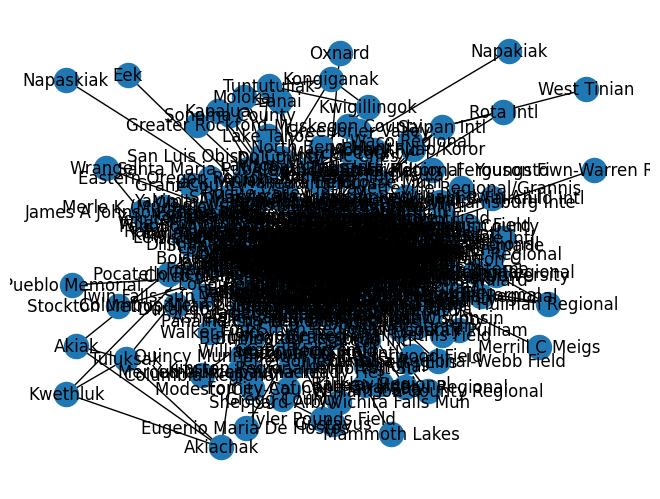

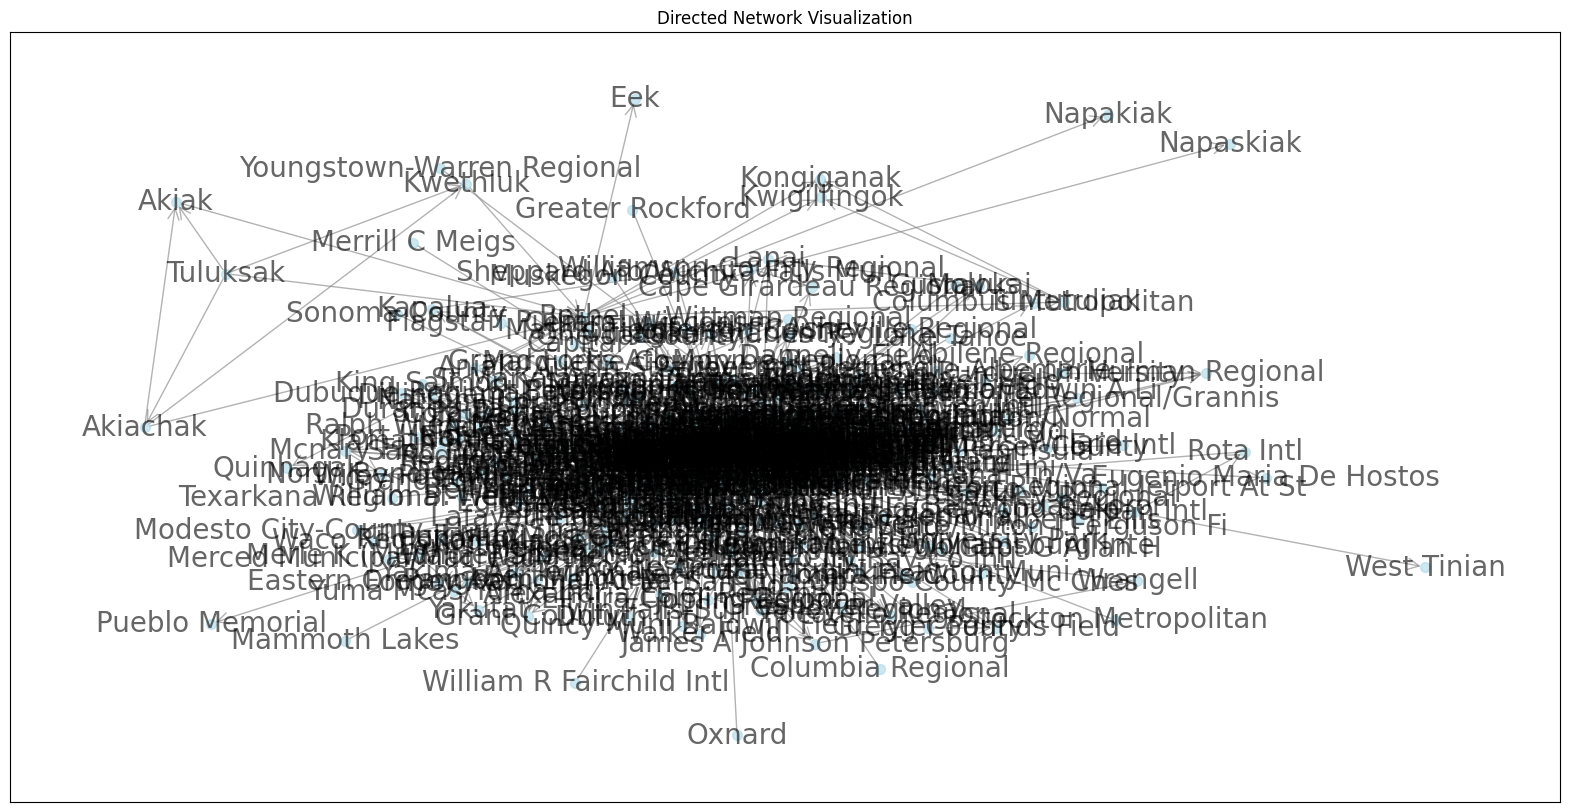

In [ ]:
pos = nx.draw_spring(G, with_labels=True)  # Automatically positions nodes (seed for reproducibility)

# Visualization options
options = {
    'node_color': 'lightblue',  # Color of nodes
    'node_size': 50,           # Size of nodes
    'edge_color': 'gray',       # Color of edges
    'alpha': 0.6,               # Transparency of nodes
    'with_labels': True,        # Display node labels
    'font_size': 20             # Font size for labels
}

# Draw the network with directed edges
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
nx.draw_networkx(G, pos=pos, **options, arrows=True, arrowstyle='->', arrowsize=20)
plt.title("Directed Network Visualization")
plt.show()

In [ ]:
import networkx as nx
import plotly.graph_objects as go


# Get positions for nodes using spring layout in 3D
pos = nx.spring_layout(G, dim=3, seed=42)

# Extract node positions
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
z_nodes = [pos[node][2] for node in G.nodes()]

# Set node colors based on the degree
node_colors = []
for node in G.nodes():
    degree = G.degree[node]  # Get the degree (number of links)
    if degree > 10:
        node_colors.append('purple')  # More than 4 links
    elif degree > 5:
        node_colors.append('red')     # More than 1 link
    else:
        node_colors.append('lightblue')  # 1 or 0 links

# Extract edge positions
x_edges = []
y_edges = []
z_edges = []

for edge in G.edges():
    x_edges.extend([pos[edge[0]][0], pos[edge[1]][0], None])
    y_edges.extend([pos[edge[0]][1], pos[edge[1]][1], None])
    z_edges.extend([pos[edge[0]][2], pos[edge[1]][2], None])

# Create node trace
node_trace = go.Scatter3d(
    x=x_nodes,
    y=y_nodes,
    z=z_nodes,
    mode='markers+text',
    marker=dict(size=5, color=node_colors, opacity=0.8),
    text=[str(node) for node in G.nodes()],
    textposition='top center'
)

# Create edge trace
edge_trace = go.Scatter3d(
    x=x_edges,
    y=y_edges,
    z=z_edges,
    mode='lines',
    line=dict(width=1, color='gray')
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="3D Network Visualization",
                    showlegend=False,
                    scene=dict(
                        xaxis_title='X Axis',
                        yaxis_title='Y Axis',
                        zaxis_title='Z Axis'
                    )
                    , width=2000, height=2000
                ))

# Show the figure
fig.show()
